## Gold Analysis

### Dataset Overview
- XAUUSD https://stooq.com/q/d/?s=xauusd&c=0&d1=20030101&d2=20220526
- breakeven inflation rate represents a measure of expected inflation https://fred.stlouisfed.org/series/T10YIE
- 10 Year Treasury Rate  https://fred.stlouisfed.org/series/DFII10
- SPX Historical https://www.nasdaq.com/market-activity/index/spx/historical
- Cboe Volatility Index® (VIX Index) https://www.cboe.com/tradable_products/vix/vix_historical_data/
- spdr gold Total NAV Ounces in the Trust https://www.spdrgoldshares.com/usa/historical-data/

### Research Question/direction:
- Exploratory Data Analysis
- Pre process, Modeling Regression and Relationships Analysis 

## Data Assessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.rcParams.update({'font.size': 16,
                     'axes.labelweight': 'bold',
                     'figure.figsize': (8,6)})
pd.set_option('display.float_format', lambda x: '%.9f' % x)

#### XAUUSD

In [2]:
gold = pd.read_csv('xauusd_d.csv')
gold.Date = pd.to_datetime(gold.Date)
gold = gold[['Date','Close']]

#### 10Y breakeven inflation rate

In [3]:
inflation = pd.read_csv('T10YIE.csv')
inflation.DATE = pd.to_datetime(inflation.DATE)
inflation.columns = ['Date', 'T10YIE']

#### 10Y Treasury Rate

In [4]:
bondyields = pd.read_csv('DFII10.csv')
bondyields.DATE = pd.to_datetime(bondyields.DATE)
bondyields.columns = ['Date', 'DFII10']
bondyields = bondyields[bondyields.DFII10 != '.']

#### S&P pe-ratio

In [5]:
spx = pd.read_csv('HistoricalData_1654181193512.csv')
spx.Date = pd.to_datetime(spx.Date)
spx.columns = ['Date', 'spx']

#### Cboe Volatility Index®

In [6]:
vix = pd.read_csv('VIX_History.csv')[['DATE','CLOSE']]
vix.DATE = pd.to_datetime(vix.DATE)
vix.columns = ['Date', 'VIX']

#### spdr gold holding nav ounces

In [7]:
sdpr_ounces = pd.read_csv('GLD_US_archive_EN.csv')
sdpr_ounces.Date = pd.to_datetime(sdpr_ounces.Date)
sdpr_ounces.columns = ['Date', 'ounces']
sdpr_ounces = sdpr_ounces[~sdpr_ounces.ounces.str.contains('H')]

### Merge

In [8]:
df = gold.merge(inflation, how = 'left', on = 'Date')
df = df.merge(bondyields, how = 'left', on = 'Date')
df = df.merge(spx, how = 'left', on = 'Date')
df = df.merge(vix, how = 'left', on = 'Date')
df = df.merge(sdpr_ounces, how = 'left', on = 'Date')

In [9]:
df.columns = ['Date', 'xauusd', 'inflation', 'bondyields', 'spx', 'VIX', 'spdr_ounces']
df.dropna(inplace = True)

In [10]:
df.inflation = df.inflation.astype(float)
df.bondyields  = df.bondyields.astype(float)
df.spx = df.spx.astype(float)
df.spdr_ounces = df.spdr_ounces.astype(float)

In [11]:
df = df.set_index('Date')

In [12]:
df.head(3)

,xauusd,inflation,bondyields,spx,VIX,spdr_ounces
Date,,,,,,
2012-06-04,1616.470000000,2.090000000,-0.560000000,1278.180000000,26.120000000,40956627.979999997
2012-06-05,1615.340000000,2.130000000,-0.560000000,1285.500000000,24.680000000,40956627.979999997
2012-06-06,1618.890000000,2.160000000,-0.500000000,1315.130000000,22.160000000,40985745.549999997


In [13]:
def basic_info(df):
    print("This dataset has ", df.shape[1], " columns and ", df.shape[0], " rows.")
    print("This dataset has ", df[df.duplicated()].shape[0], " duplicated rows.")
    print(" ")
    print("Descriptive statistics of the numeric features in the dataset: ")
    print(" ")
    print(df.describe().T)
    print(" ")
    print("Information about this dataset: ")
    print(" ")
    print(df.info())

In [14]:
basic_info(df)

This dataset has  6  columns and  2492  rows.
This dataset has  0  duplicated rows.
 
Descriptive statistics of the numeric features in the dataset: 
 
                     count               mean               std  \
xauusd      2492.000000000     1432.886434591     251.230607183   
inflation   2492.000000000        1.962532103       0.371484335   
bondyields  2492.000000000        0.087219101       0.612356187   
spx         2492.000000000     2593.985357143     871.991860415   
VIX         2492.000000000       17.363659711       7.097311024   
spdr_ounces 2492.000000000 29561963.470802575 5809113.613866831   

                           min                25%                50%  \
xauusd          1051.580000000     1243.065000000     1318.420000000   
inflation          0.500000000        1.697500000        1.950000000   
bondyields        -1.190000000       -0.530000000        0.300000000   
spx             1278.180000000     1976.480000000     2403.355000000   
VIX               

## Exploratory Data Analysis

#### Relationships over time, Colormap represent more recent dates.

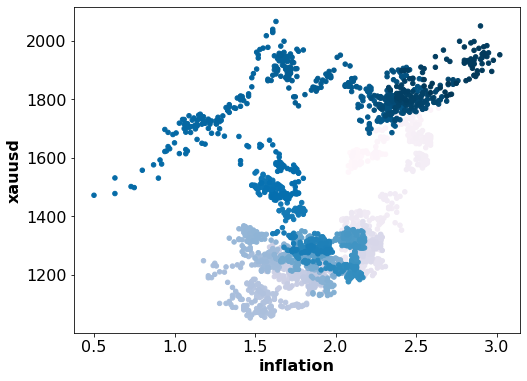

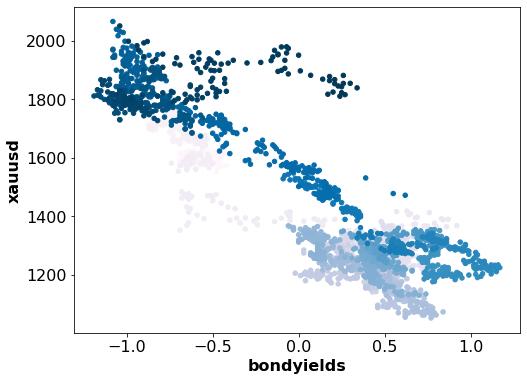

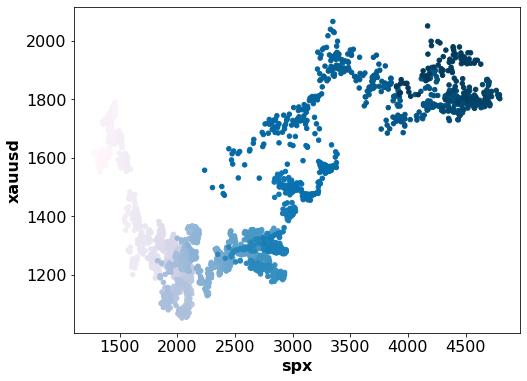

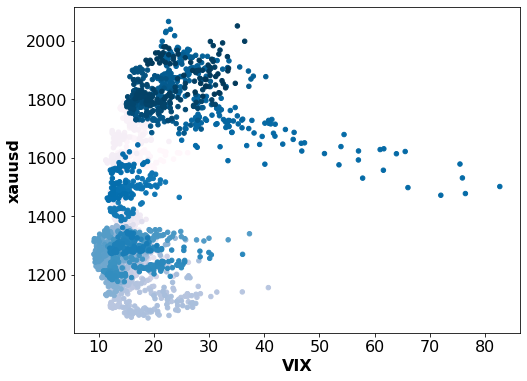

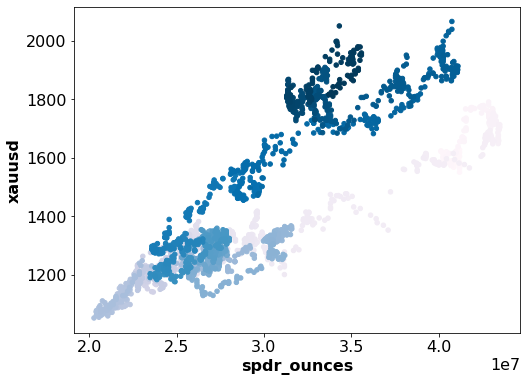

In [15]:
for i in ['inflation', 'bondyields', 'spx', 'VIX', 'spdr_ounces']:
    df.plot.scatter(x = i, y= 'xauusd', color = df.index, colormap='PuBu')

#### Gold vs Bond Yields 3 Y Rolling Correlation

 
 inflation VS xauusd Rolling Correlation Average : 0.054279691489483244
 


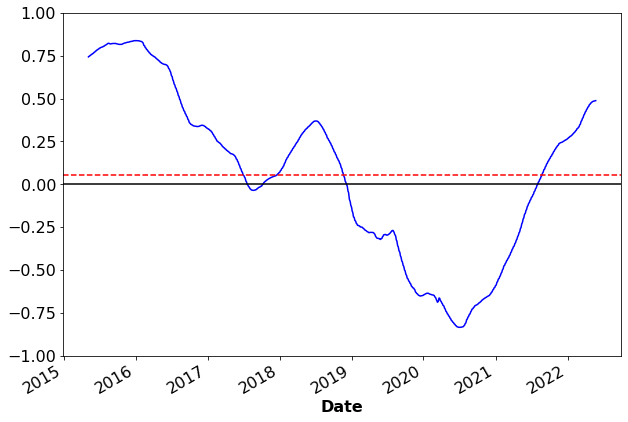

 
 bondyields VS xauusd Rolling Correlation Average : -0.6842291351657493
 


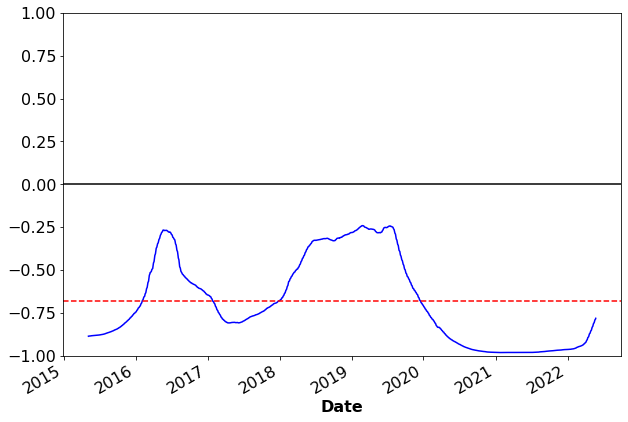

 
 spx VS xauusd Rolling Correlation Average : 0.21336022297809765
 


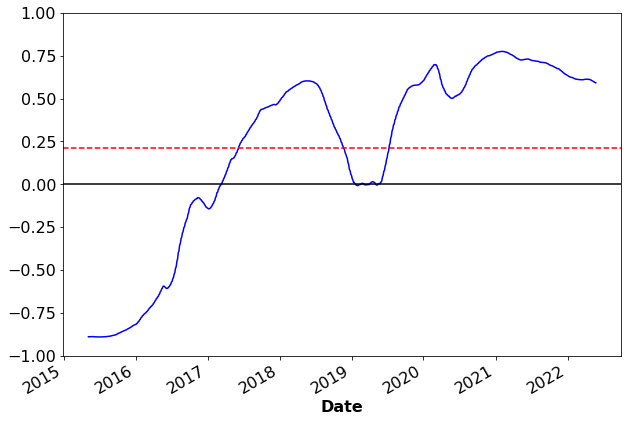

 
 VIX VS xauusd Rolling Correlation Average : 0.011929628446762349
 


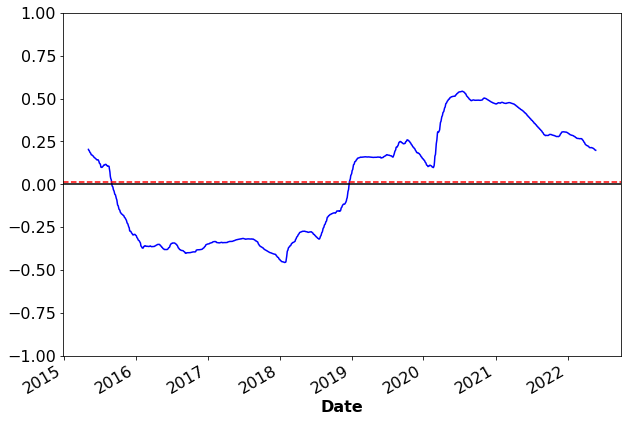

 
 spdr_ounces VS xauusd Rolling Correlation Average : 0.7937699336062614
 


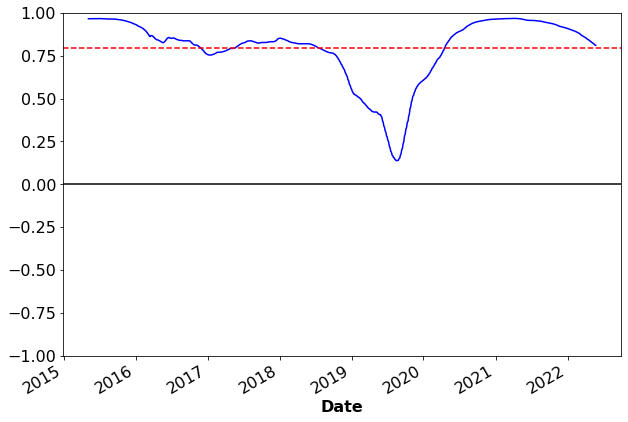

In [16]:
windows = 365*2
for i in ['inflation', 'bondyields', 'spx', 'VIX', 'spdr_ounces']:
    print(' ')
    print(f" {i} VS xauusd Rolling Correlation Average : {df['xauusd'].rolling(windows).corr(df[i]).mean()}")
    print(' ')
    df['xauusd'].rolling(windows).corr(df[i]).plot(figsize=(10,7), color = 'blue')
    plt.axhline(0, color = 'black')
    plt.axhline(df['xauusd'].rolling(windows).corr(df[i]).mean(), linestyle = '--', color = 'red')
    plt.ylim(-1, 1)
    plt.show()

#### Rsquare

In [17]:
df.corr().pow(2).iloc[0:1]

,xauusd,inflation,bondyields,spx,VIX,spdr_ounces
xauusd,1.000000000,0.129862584,0.792429931,0.388377824,0.207107954,0.682822383


#### Coincidence Descriptive with linear regression

In [18]:
import statsmodels.formula.api as smf
model = smf.ols(formula='xauusd ~ inflation+ bondyields+ spx+ VIX+ spdr_ounces', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 xauusd   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                 1.110e+04
Date:                Sat, 04 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:28:25   Log-Likelihood:                -13383.
No. Observations:                2492   AIC:                         2.678e+04
Df Residuals:                    2486   BIC:                         2.681e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     305.4376     13.114     23.292      

---------------------------------------------

## Pre process, Modeling and feature important

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
xauusd,2492.000000000,1432.886434591,251.230607183,1051.580000000,1243.065000000,1318.420000000,1667.945000000,2065.350000000
inflation,2492.000000000,1.962532103,0.371484335,0.500000000,1.697500000,1.950000000,2.200000000,3.020000000
bondyields,2492.000000000,0.087219101,0.612356187,-1.190000000,-0.530000000,0.300000000,0.540000000,1.170000000
spx,2492.000000000,2593.985357143,871.991860415,1278.180000000,1976.480000000,2403.355000000,2979.817500000,4796.560000000
VIX,2492.000000000,17.363659711,7.097311024,9.140000000,13.020000000,15.415000000,19.460000000,82.690000000
spdr_ounces,2492.000000000,29561963.470802575,5809113.613866831,20260461.730000000,25465940.615000002,27520650.155000001,32849346.232500002,43511414.990000002


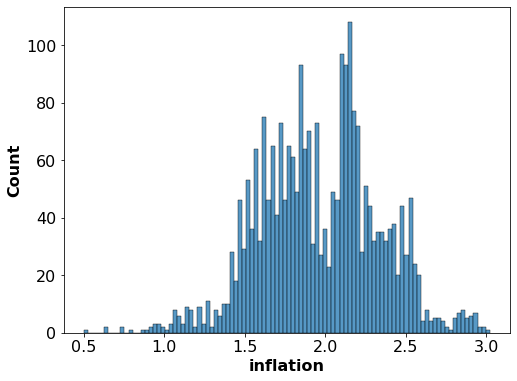

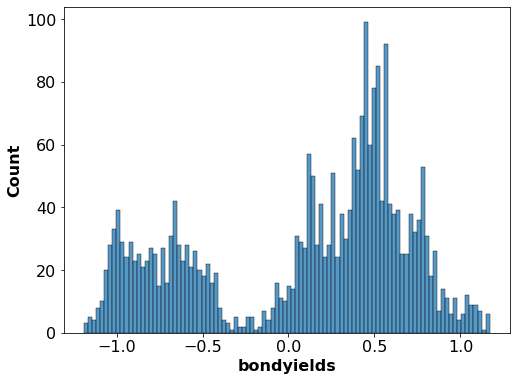

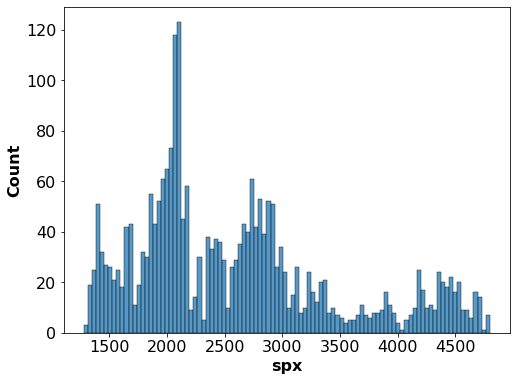

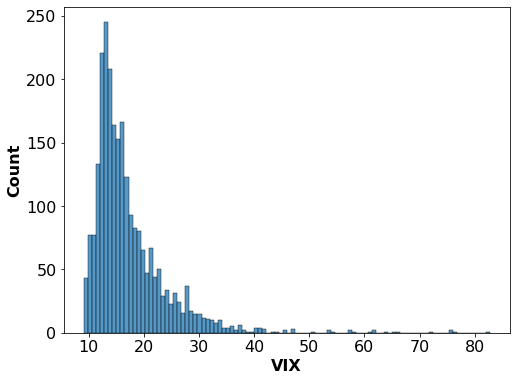

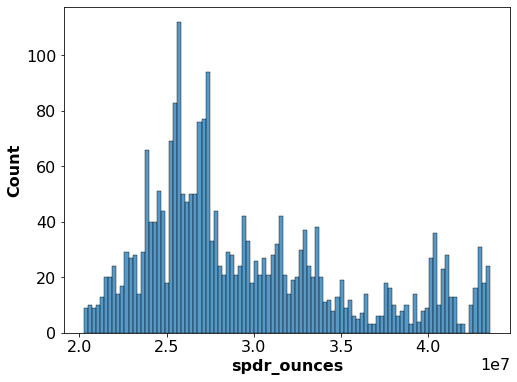

In [20]:
for i in ['inflation', 'bondyields', 'spx', 'VIX', 'spdr_ounces']:
    sns.histplot(data=df, x=i, bins = 100)
    plt.show()

#### Define Target

In [21]:
df["xauusd_rets"] = df["xauusd"].pct_change() #coincidence
df["xauusd-T+1M"] = df["xauusd"].pct_change(periods=-7*4) # 1month
df["xauusd-T+2M"] = df["xauusd"].pct_change(periods=-7*12) # 2month

#### Feature Creation

In [22]:
# xauusd percent change
df['xauusd_rets'] = df["xauusd"].pct_change()
df['xauusd_rollret10'] = df["xauusd"].pct_change().rolling(28).mean() 
df['xauusd_rollret20'] = df["xauusd"].pct_change().rolling(84).mean()

In [23]:
# spx percent change
df['spx_rets'] = df["spx"].pct_change()
df['spx_rollret10'] = df["spx"].pct_change().rolling(28).mean() 
df['spx_rollret20'] = df["spx"].pct_change().rolling(84).mean()

In [24]:
# inflation percent change
df['inflation_rets'] = df["inflation"].pct_change()
df['inflation_rollret10'] = df["inflation"].pct_change().rolling(28).mean() 
df['inflation_rollret20'] = df["inflation"].pct_change().rolling(84).mean()

In [25]:
# spdr_ounces percent change
df['spdr_ounces_rollret10'] = df["spdr_ounces"].pct_change().rolling(28).mean() 
df['spdr_ounces_rollret20'] = df["spdr_ounces"].pct_change().rolling(84).mean()

#### VIX label

In [26]:
# VIX Label
df['VIX_label'] = 0
df.loc[(df['VIX'] > 0) & (df['VIX'] <= 20) ,'VIX_label'] = 0
df.loc[(df['VIX'] > 20) ,'VIX_label'] = 1
df.loc[(df['VIX'] > 30) ,'VIX_label'] = 2
df.loc[(df['VIX'] > 40) ,'VIX_label'] = 3
df.loc[(df['VIX'] > 50) ,'VIX_label'] = 4
df.loc[(df['VIX'] > 60) ,'VIX_label'] = 5

#### Flag high volatility

In [27]:
# flag inflation and spdr ounces 

dfinflation_rets = df[['inflation']].copy()
dfspdr_ounces_rets = df[['spdr_ounces']].copy()

dfinflation_rets['inflation'] = dfinflation_rets['inflation'].pct_change()
dfspdr_ounces_rets['spdr_ounces'] = dfspdr_ounces_rets['spdr_ounces'].pct_change()

dfinflation_rets[['mean','sd']] = dfinflation_rets.rolling(30).agg(["mean", "std"])
dfspdr_ounces_rets[['mean','sd']] = dfspdr_ounces_rets.rolling(30).agg(["mean", "std"])

dfinflation_rets.dropna(inplace = True)
dfspdr_ounces_rets.dropna(inplace = True)

def inflation_detection(df, n_sigmas = 2):
    x = df['inflation']
    mu = df["mean"]
    sigma = df["sd"]
    if (x > mu + sigma*n_sigmas) | (x < mu - n_sigmas * sigma):
        return 1
    else:
        return 0
    
def spdr_detection(df, n_sigmas = 2):
    x = df['spdr_ounces']
    mu = df["mean"]
    sigma = df["sd"]
    if (x > mu + sigma*n_sigmas) | (x < mu - n_sigmas * sigma):
        return 1
    else:
        return 0    
    
dfinflation_rets['inflation_flag'] = dfinflation_rets.apply(inflation_detection, axis=1)
dfspdr_ounces_rets['spdr_flag'] = dfspdr_ounces_rets.apply(spdr_detection, axis=1)

df = df.merge(dfinflation_rets['inflation_flag'], on = 'Date')
df = df.merge(dfspdr_ounces_rets['spdr_flag'], on = 'Date')
df.dropna(inplace=True)

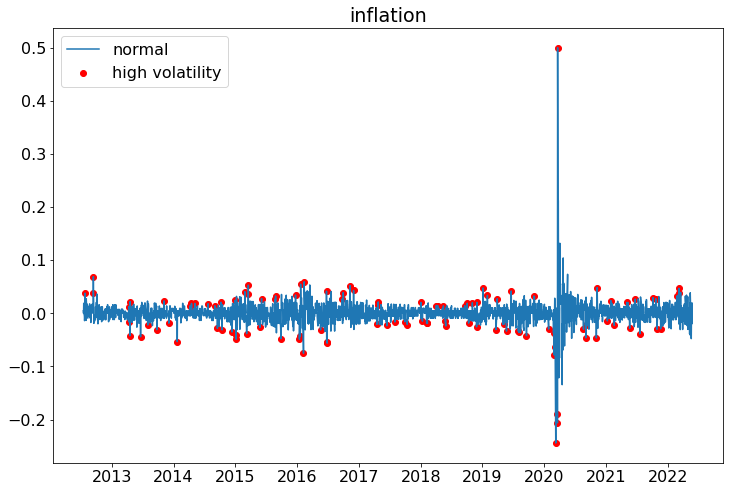

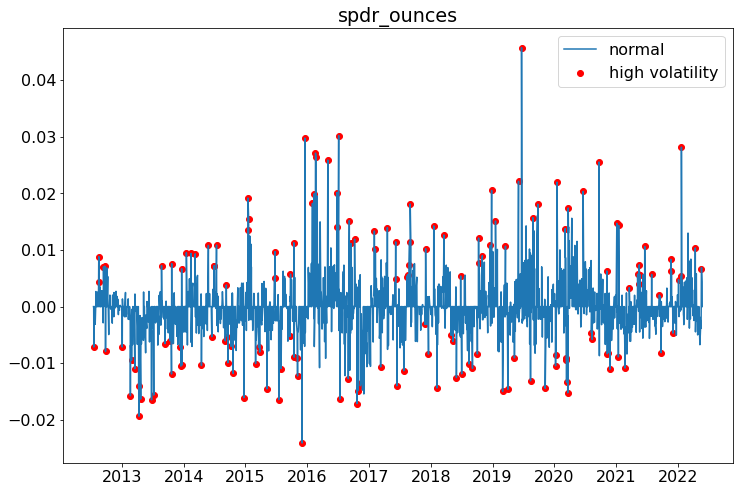

In [28]:
# flag inflation and spdr ounces 
import matplotlib as mpl

inflation_out = dfinflation_rets.loc[dfinflation_rets['inflation_flag'] == 1, ['inflation']]
mpl.rcParams['figure.figsize'] = (12.0, 8.0)
fig, ax = plt.subplots()
ax.plot(dfinflation_rets.index, dfinflation_rets["inflation"], label='normal')
ax.scatter(inflation_out.index, inflation_out["inflation"], color="red", label="high volatility")
ax.set_title(f"inflation")
ax.legend()
plt.show()

spdr_out = dfspdr_ounces_rets.loc[dfspdr_ounces_rets['spdr_flag'] == 1, ['spdr_ounces']]
mpl.rcParams['figure.figsize'] = (12.0, 8.0)
fig, ax = plt.subplots()
ax.plot(dfspdr_ounces_rets.index, dfspdr_ounces_rets["spdr_ounces"], label='normal')
ax.scatter(spdr_out.index, spdr_out["spdr_ounces"], color="red", label="high volatility")
ax.set_title(f"spdr_ounces")
ax.legend()
plt.show()

#### Select Feature

In [29]:
df.columns

Index(['xauusd', 'inflation', 'bondyields', 'spx', 'VIX', 'spdr_ounces',
       'xauusd_rets', 'xauusd-T+1M', 'xauusd-T+2M', 'xauusd_rollret10',
       'xauusd_rollret20', 'spx_rets', 'spx_rollret10', 'spx_rollret20',
       'inflation_rets', 'inflation_rollret10', 'inflation_rollret20',
       'spdr_ounces_rollret10', 'spdr_ounces_rollret20', 'VIX_label',
       'inflation_flag', 'spdr_flag'],
      dtype='object')

In [30]:
model_data = df[['xauusd_rollret10',
       'xauusd_rollret20', 'spx_rets', 'spx_rollret10', 'spx_rollret20',
       'inflation_rets', 'inflation_rollret10', 'inflation_rollret20',
       'spdr_ounces_rollret10', 'spdr_ounces_rollret20', 'VIX_label','inflation_flag', 'spdr_flag', 'xauusd_rets', 'xauusd-T+1M', 'xauusd-T+2M']].copy()
model_data.dropna(inplace = True)

#### Check

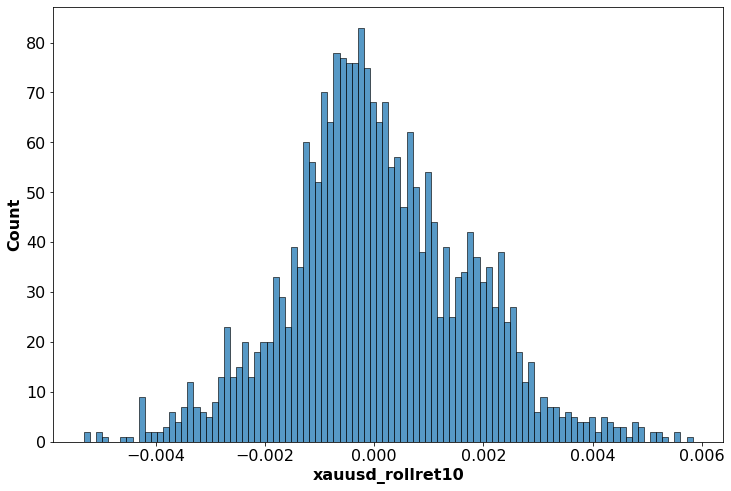

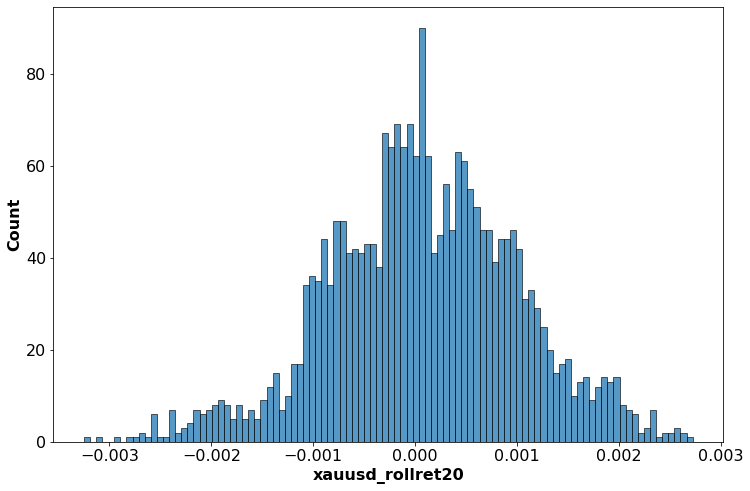

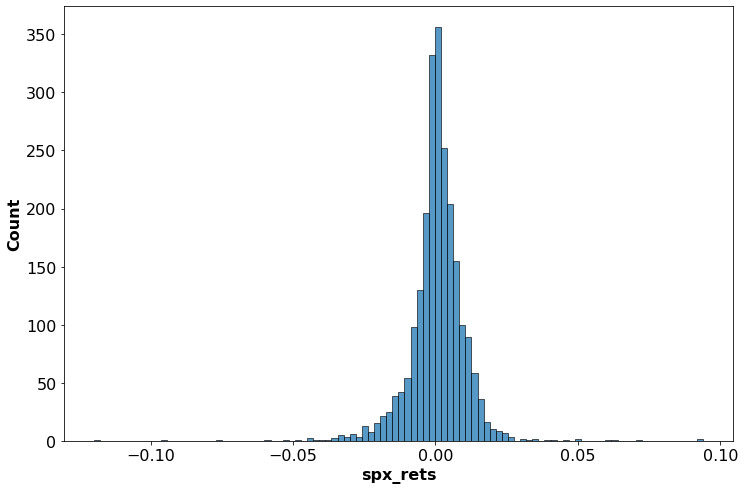

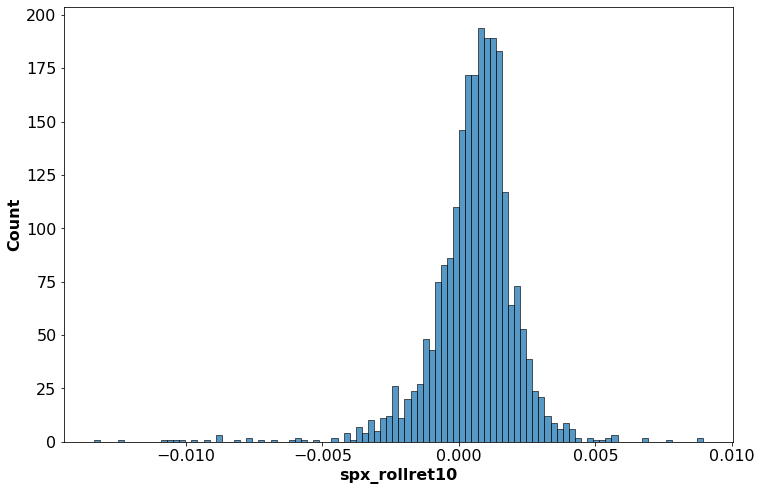

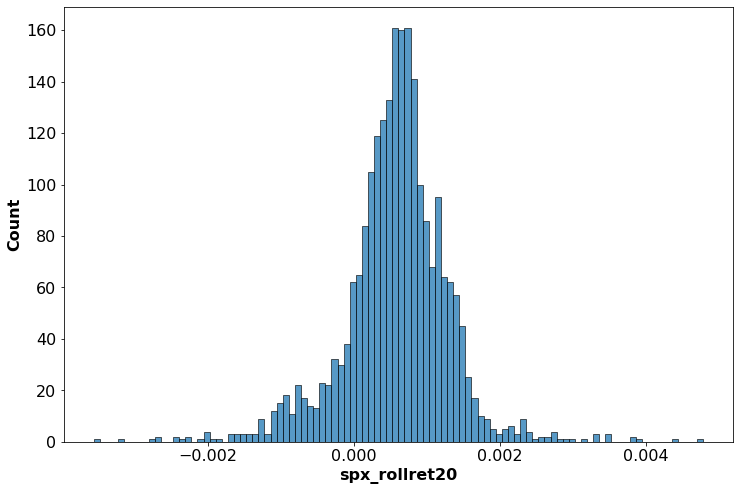

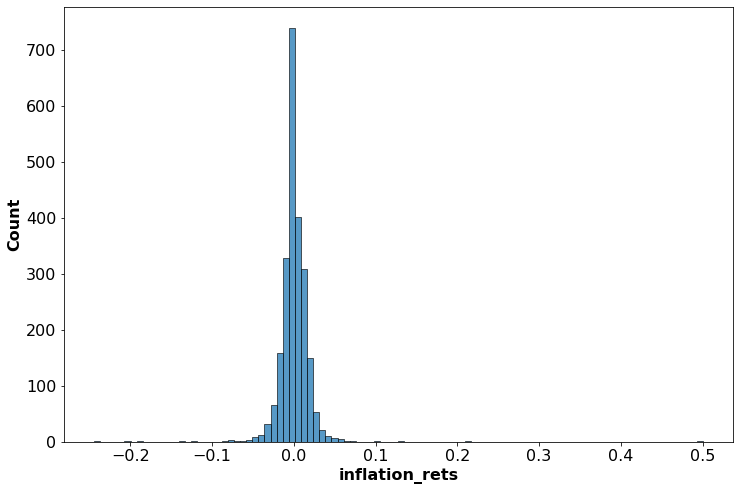

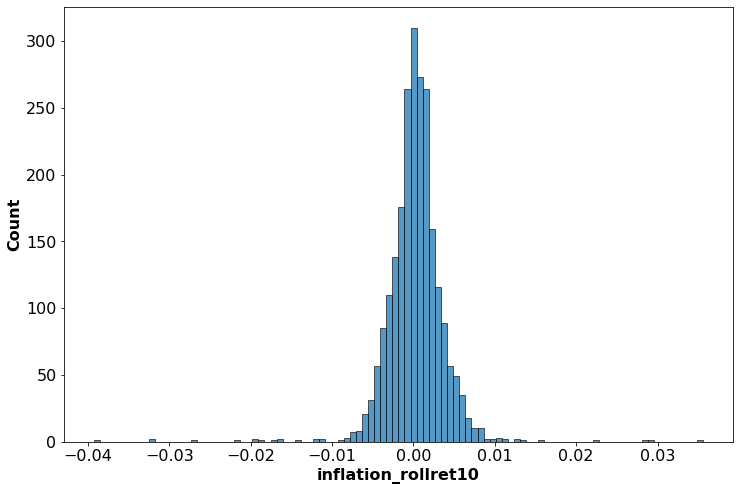

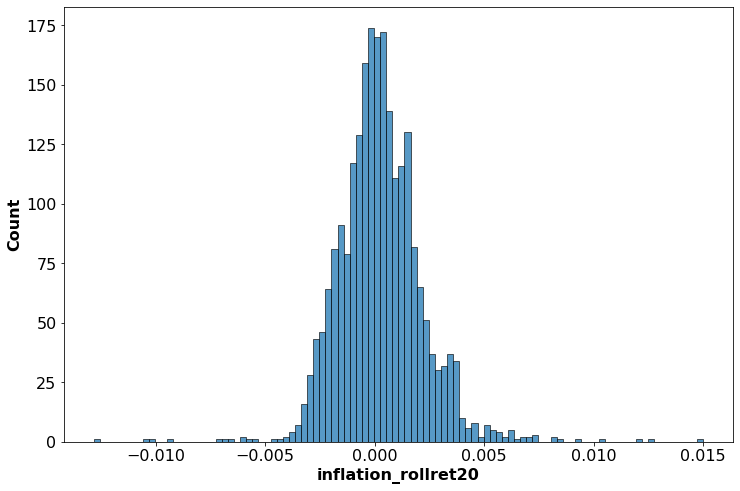

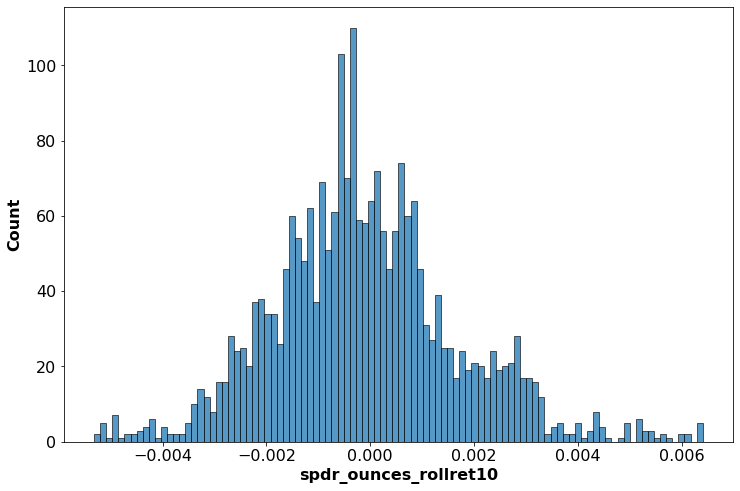

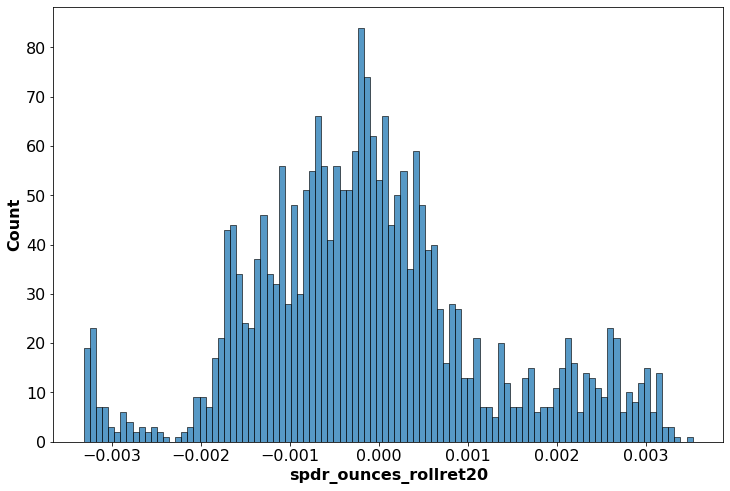

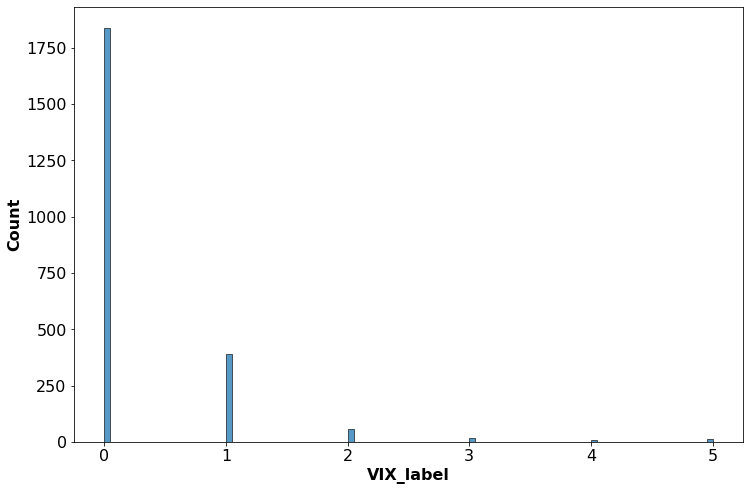

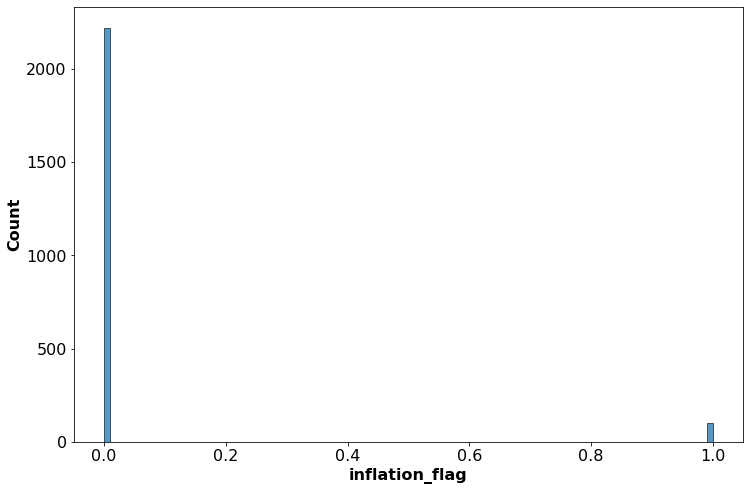

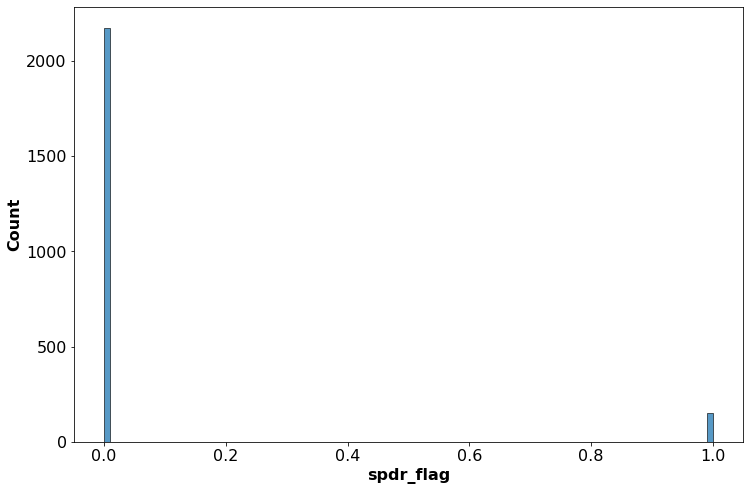

In [31]:
for i in ['xauusd_rollret10',
       'xauusd_rollret20', 'spx_rets', 'spx_rollret10', 'spx_rollret20',
       'inflation_rets', 'inflation_rollret10', 'inflation_rollret20',
       'spdr_ounces_rollret10', 'spdr_ounces_rollret20', 'VIX_label','inflation_flag', 'spdr_flag']:
    sns.histplot(data=model_data, x=i, bins = 100)
    plt.show()

In [32]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2324 entries, 2012-10-02 to 2022-01-24
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   xauusd_rollret10       2324 non-null   float64
 1   xauusd_rollret20       2324 non-null   float64
 2   spx_rets               2324 non-null   float64
 3   spx_rollret10          2324 non-null   float64
 4   spx_rollret20          2324 non-null   float64
 5   inflation_rets         2324 non-null   float64
 6   inflation_rollret10    2324 non-null   float64
 7   inflation_rollret20    2324 non-null   float64
 8   spdr_ounces_rollret10  2324 non-null   float64
 9   spdr_ounces_rollret20  2324 non-null   float64
 10  VIX_label              2324 non-null   int64  
 11  inflation_flag         2324 non-null   int64  
 12  spdr_flag              2324 non-null   int64  
 13  xauusd_rets            2324 non-null   float64
 14  xauusd-T+1M            2324 non-null  

## Coincidence model

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [34]:
feature = ['xauusd_rollret10',
       'xauusd_rollret20', 'spx_rets', 'spx_rollret10', 'spx_rollret20',
       'inflation_rets', 'inflation_rollret10', 'inflation_rollret20',
       'spdr_ounces_rollret10', 'spdr_ounces_rollret20', 'VIX_label','inflation_flag', 'spdr_flag']
    
target = ['xauusd_rets']

X_train = model_data.iloc[:-300][feature]
y_train = model_data.iloc[:-300][target]
X_test = model_data.iloc[-300:][feature]
y_test = model_data.iloc[-300:][target]

In [35]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(random_state = 42)
                               , param_distributions = random_grid)
rf_random.fit(X_train, y_train)

predictions = rf_random.predict(X_test)
compare = pd.DataFrame(y_test)
compare['predict'] = predictions
print(f"R Square {r2_score(compare.xauusd_rets, compare.predict)}")

R Square 0.004483440178412401


In [36]:
compare.head()

,xauusd_rets,predict
Date,,
2020-11-10,0.007730049,-0.000188567
2020-11-12,-0.000133173,-0.001946549
2020-11-13,0.005769815,-0.000898723
2020-11-16,0.000609162,-0.000700448
2020-11-17,-0.004467996,-0.000380844


<AxesSubplot:xlabel='Date'>

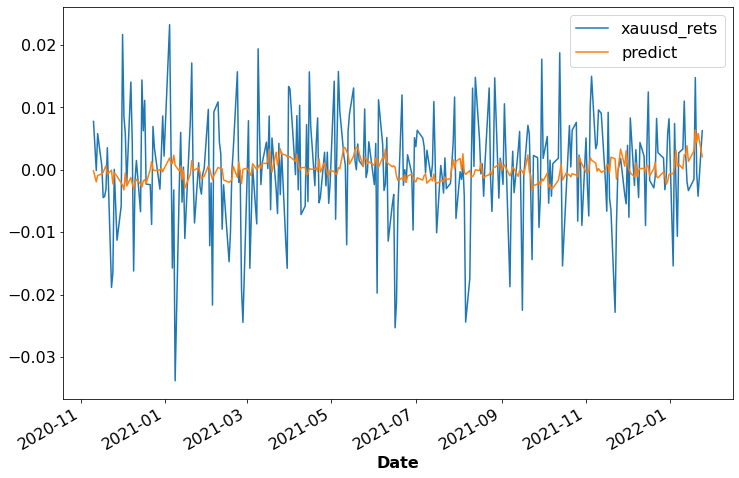

In [37]:
compare.plot()

## 1- month model

In [40]:
feature = ['xauusd_rollret10',
       'xauusd_rollret20', 'spx_rets', 'spx_rollret10', 'spx_rollret20',
       'inflation_rets', 'inflation_rollret10', 'inflation_rollret20',
       'spdr_ounces_rollret10', 'spdr_ounces_rollret20', 'VIX_label','inflation_flag', 'spdr_flag']
    
target = ['xauusd-T+1M']

X_train = model_data.iloc[:-300][feature]
y_train = model_data.iloc[:-300][target]
X_test = model_data.iloc[-300:][feature]
y_test = model_data.iloc[-300:][target]

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(random_state = 42)
                               , param_distributions = random_grid)
rf_random.fit(X_train, y_train)

predictions = rf_random.predict(X_test)
compare = pd.DataFrame(y_test)
compare['predict'] = predictions
print(f"R Square {r2_score(compare['xauusd-T+1M'], compare.predict)}")

R Square 0.06992218575979947


In [41]:
compare.head()

,xauusd-T+1M,predict
Date,,
2020-11-10,0.009105960,0.014161568
2020-11-12,0.002028603,0.005986683
2020-11-13,0.004266366,0.018797056
2020-11-16,0.008020449,0.021877276
2020-11-17,0.001139261,0.011748362


<AxesSubplot:xlabel='Date'>

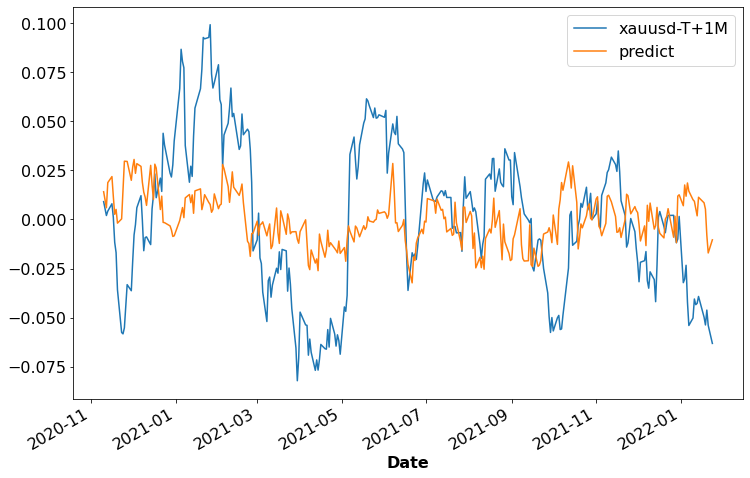

In [42]:
compare.plot()

## 2 - month model 

In [43]:
feature = ['xauusd_rollret10',
       'xauusd_rollret20', 'spx_rets', 'spx_rollret10', 'spx_rollret20',
       'inflation_rets', 'inflation_rollret10', 'inflation_rollret20',
       'spdr_ounces_rollret10', 'spdr_ounces_rollret20', 'VIX_label','inflation_flag', 'spdr_flag']
    
target = ['xauusd-T+2M']

X_train = model_data.iloc[:-300][feature]
y_train = model_data.iloc[:-300][target]
X_test = model_data.iloc[-300:][feature]
y_test = model_data.iloc[-300:][target]

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(random_state = 42)
                               , param_distributions = random_grid)
rf_random.fit(X_train, y_train)

predictions = rf_random.predict(X_test)
compare = pd.DataFrame(y_test)
compare['predict'] = predictions
print(f"R Square {r2_score(compare['xauusd-T+2M'], compare.predict)}")

R Square -0.28044000576056227


In [44]:
compare.head()

,xauusd-T+2M,predict
Date,,
2020-11-10,0.083564937,0.027299646
2020-11-12,0.074185352,-0.016454974
2020-11-13,0.087352694,-0.004732409
2020-11-16,0.082515759,-0.011215576
2020-11-17,0.080965342,-0.028128297


<AxesSubplot:xlabel='Date'>

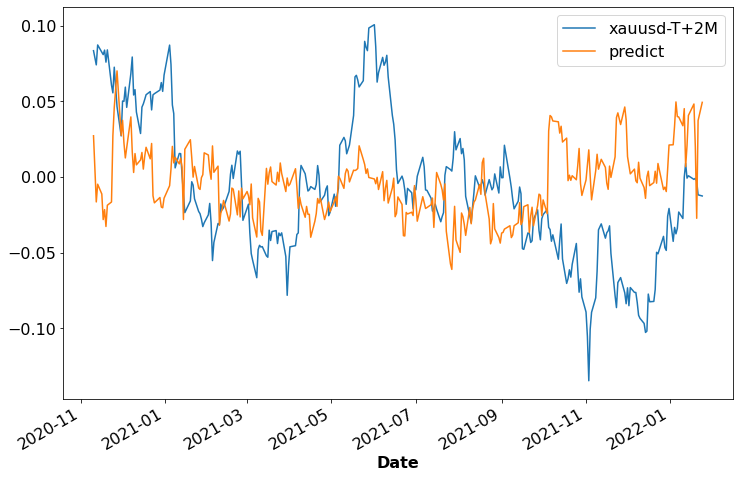

In [45]:
compare.plot()

--------------------------------------------------------------

In [ ]:
# model_data = model_data[(model_data.xauusd_rollret20 > -0.003) & (model_data.xauusd_rollret20 < 0.003)]
# model_data = model_data[(model_data.spx_rets > -0.025) & (model_data.spx_rets < 0.025)]
# model_data = model_data[(model_data.spx_rollret10 > -0.003) & (model_data.spx_rollret10 < 0.003)]
# model_data = model_data[(model_data.spx_rollret20 > -0.001) & (model_data.spx_rollret20 < 0.0025)]
# model_data = model_data[(model_data.inflation_rollret10 > -0.01) & (model_data.inflation_rollret10 < 0.01)]
# model_data = model_data[(model_data.inflation_rollret20 > -0.005) & (model_data.inflation_rollret20 < 0.06)]

In [ ]:
# from sklearn.model_selection import train_test_split
# from keras.models import Sequential
# from keras.layers import Dense
# import tensorflow as tf

# def create_model(inn = 5):
#     m = Sequential()
#     m.add(Dense(10, activation='relu', input_shape=(inn,)))
#     m.add(Dense(10, activation='relu'))
#     m.add(Dense(1, activation='sigmoid'))
#     return m

# def select_inputs(train_inputs, train_targets, epochs, learning_rate = 0.001):
#     print('Training')
#     m = create_model()
#     m.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate), 
#               loss='mse', metrics = ['accuracy']) 
#     h = m.fit(train_inputs, train_targets,
#                   epochs=epochs,
#                   batch_size=16,
#                   validation_split = 0.2, verbose=False)
#     model_info = {'model': m, 'history': h.history}
#     return h, m

# def plot_loss(x):
#     plt.plot(x.history['loss'])
#     plt.plot(x.history['val_loss'])
#     plt.xlabel('epoch')
#     plt.ylabel('loss')
#     plt.legend(['train','test'])
#     plt.show()
    
# testnndata = df[['inflation', 'bondyields', 'spx', 'VIX', 'spdr_ounces','xauusd']].pct_change().dropna()
# Xn = testnndata.iloc[:, :-1]
# yn = testnndata.iloc[:, :-1]
# X_train, X_test, y_train, y_test = train_test_split(Xn, yn, test_size=0.25, random_state=0)    